In [1]:
import cv_strategy
import pandas as pd
import tushare as ts
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import akshare as ak

In [2]:
sz50_data = ts.get_k_data('sz50',start='2000-01-01',ktype='D').set_index('date')

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_

In [3]:
period=240
period2 = 120

# sz50['pos'] = (sz50.close-sz50.close.rolling(period).mean())/sz50.close.rolling(period).std()


In [4]:
# ROC策略下的股债轮动
sz50=sz50_data.copy()
sz50['return'] = sz50.close.pct_change()
sz50['pos'] = sz50.close/sz50.close.shift(period)
sz50['posma'] = sz50.pos.rolling(period2).mean()
sz50.dropna(inplace=True)

df_wt = pd.DataFrame(columns=['cash','sz50'],index=sz50.index)
df_wt.iloc[0,0] = 0.5
df_wt.iloc[0,1] = 0.5

df_rt = pd.DataFrame(columns=['cash','sz50'],index=sz50.index)
df_rt['cash'] = 0.00015
df_rt['sz50'] = sz50['return']

for i in sz50.index[1:]:
    df_wt.loc[i,'cash'] = df_wt.shift(1).loc[i,'cash']*(1+df_rt.loc[i,'cash'])
    df_wt.loc[i,'sz50'] = df_wt.shift(1).loc[i,'sz50']*(1+df_rt.loc[i,'sz50'])
    
    if sz50.loc[i,'pos']>sz50.loc[i,'posma']:    #signal[0]:
        df_wt.loc[i,'sz50'] = df_wt.loc[i].sum()
        df_wt.loc[i,'cash'] = 0
    elif sz50.loc[i,'pos']<sz50.loc[i,'posma']:  #signal[1]:
        df_wt.loc[i,'cash'] = df_wt.loc[i].sum()
        df_wt.loc[i,'sz50'] = 0
print(df_wt.T.sum()[-1])

19.651891911711207


<Axes: xlabel='date'>

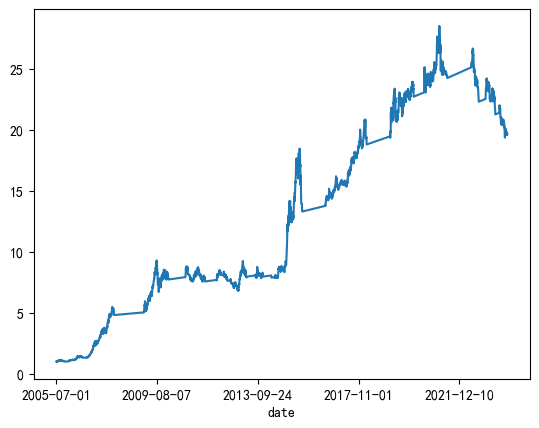

In [5]:
df_wt.T.sum().plot()

In [16]:
# POS策略下的银行ETF择时
sz50=ts.get_k_data('518880',start='2007-06-31')

sz50['return'] = sz50.close.pct_change()
sz50['pos'] = (sz50.close-sz50.close.rolling(period).mean())/sz50.close.rolling(period).std()
sz50.dropna(inplace=True)

df_wt = pd.DataFrame(columns=['cash','sz50'],index=sz50.index)
df_wt.iloc[0,0] = 0.5
df_wt.iloc[0,1] = 0.5

df_rt = pd.DataFrame(columns=['cash','sz50'],index=sz50.index)
df_rt['cash'] = 0.00015
df_rt['sz50'] = sz50['return']

signal=[-1,2.5]

for i in sz50.index[1:]:
    df_wt.loc[i,'cash'] = df_wt.shift(1).loc[i,'cash']*(1+df_rt.loc[i,'cash'])
    df_wt.loc[i,'sz50'] = df_wt.shift(1).loc[i,'sz50']*(1+df_rt.loc[i,'sz50'])
    
    if sz50.loc[i,'pos']<signal[0]:
        df_wt.loc[i,'sz50'] = df_wt.loc[i].sum()
        df_wt.loc[i,'cash'] = 0
    elif sz50.loc[i,'pos']>signal[1]:
        df_wt.loc[i,'cash'] = df_wt.loc[i].sum()
        df_wt.loc[i,'sz50'] = 0
# print(df_wt.T.sum()[-1])

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
C:\Users\Lenovo\anaconda3\Lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_

<Axes: >

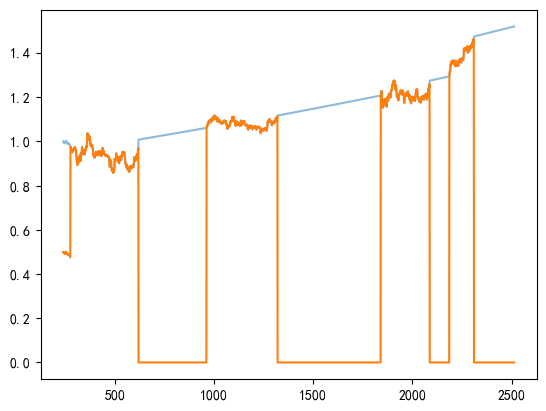

In [17]:
df_wt.T.sum().plot(alpha=0.5)
df_wt.sz50.plot()

In [7]:
# signal = np.percentile(sz50.pos,[1,99])
signal=[0.8,1.8]
print(signal)

[0.8, 1.8]


19.90951368147228


<Axes: xlabel='date'>

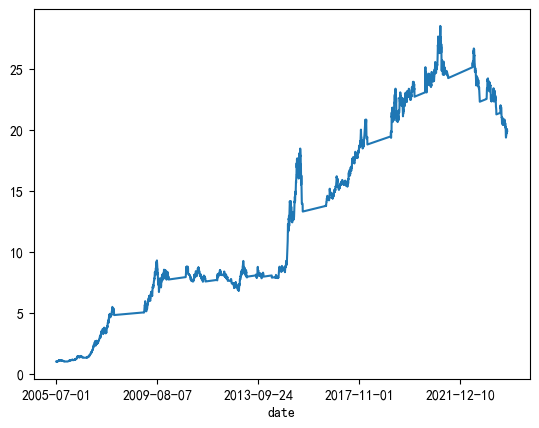

In [9]:
df_wt.T.sum().plot()

<AxesSubplot:xlabel='date'>

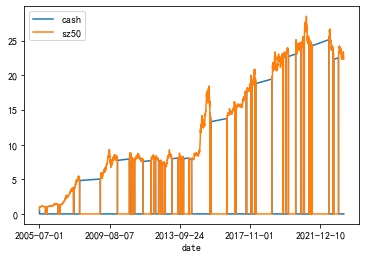

In [210]:
df_wt.plot()

<AxesSubplot:xlabel='date'>

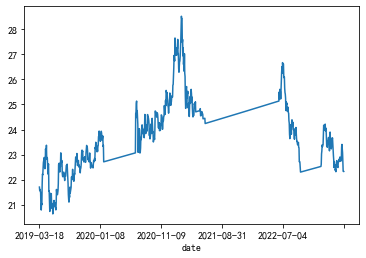

In [211]:
df_wt.T.sum().iloc[-1000:].plot()

---

In [61]:
sz50 = ts.get_k_data('hs300',start='2000-01-01',ktype='D').set_index('date')


本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [62]:
ps = [*range(2,720)]
for p in ps:
    sz50['{}pastyear_return'.format(p)] = (sz50.close)/(sz50.close.shift(p))
    sz50['{}nextyear_return'.format(p)] = (sz50.close.shift(-p))/(sz50.close)

In [63]:
sz50corr = sz50.corr()

In [64]:
cs = []
for p in ps:
    i = sz50corr.loc['{}pastyear_return'.format(p),'{}nextyear_return'.format(p)]
    cs.append(i)

Text(0, 0.5, 'corr() of past ndays and next ndays')

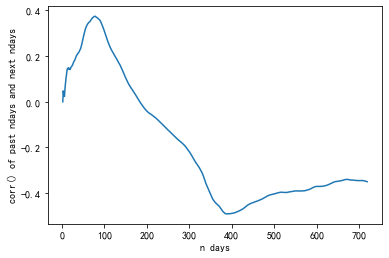

In [65]:
# hs300
plt.plot(ps,cs)
plt.xlabel('n days')
plt.ylabel('corr() of past ndays and next ndays')

Text(0, 0.5, 'corr() of past ndays and next ndays')

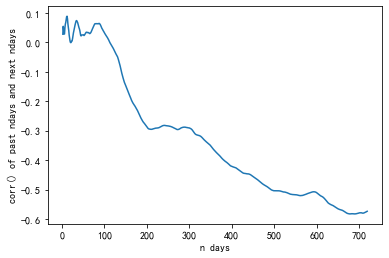

In [60]:
# zz500
plt.plot(ps,cs)
plt.xlabel('n days')
plt.ylabel('corr() of past ndays and next ndays')

Text(0, 0.5, 'corr() of past ndays and next ndays')

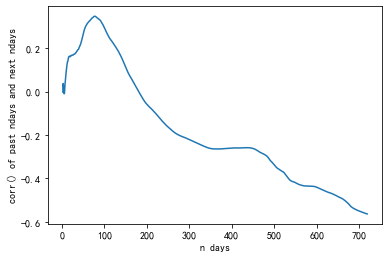

In [45]:
# sz50
plt.plot(ps,cs)
plt.xlabel('n days')
plt.ylabel('corr() of past ndays and next ndays')

In [66]:
ds = pd.DataFrame({'ps':ps,'cs':cs})
ds

,ps,cs
0,2,-0.000388
1,3,0.047212
2,4,0.036484
3,5,0.023851
4,6,0.023199
...,...,...
713,715,-0.347540
714,716,-0.348175
715,717,-0.348560
716,718,-0.349222


In [67]:
ds.sort_values('cs',ascending=False)

,ps,cs
76,78,0.373688
75,77,0.373442
74,76,0.372834
77,79,0.372705
73,75,0.371661
...,...,...
390,392,-0.490570
386,388,-0.490633
388,390,-0.490633
387,389,-0.490674


In [68]:
sz50

,open,close,high,low,volume,code,2pastyear_return,2nextyear_return,3pastyear_return,3nextyear_return,...,715pastyear_return,715nextyear_return,716pastyear_return,716nextyear_return,717pastyear_return,717nextyear_return,718pastyear_return,718nextyear_return,719pastyear_return,719nextyear_return
date,,,,,,,,,,,,,,,,,,,,,
2005-04-08,984.66,1003.45,1003.70,979.53,14762500.0,hs300,NaN,0.975335,NaN,0.997459,...,NaN,3.988071,NaN,4.023947,NaN,3.843829,NaN,3.892341,NaN,3.900912
2005-04-11,1003.88,995.42,1008.73,992.77,15936100.0,hs300,NaN,1.005505,NaN,0.991511,...,NaN,4.056408,NaN,3.874837,NaN,3.923741,NaN,3.932380,NaN,3.766169
2005-04-12,993.71,978.70,993.71,978.20,10226200.0,hs300,0.975335,1.008450,NaN,0.995279,...,NaN,3.941034,NaN,3.990773,NaN,3.999561,NaN,3.830510,NaN,4.003433
2005-04-13,987.95,1000.90,1006.50,987.95,16071700.0,hs300,1.005505,0.973204,0.997459,0.962903,...,NaN,3.902258,NaN,3.910850,NaN,3.745549,NaN,3.914637,NaN,3.787122
2005-04-14,1004.64,986.97,1006.42,985.58,12945700.0,hs300,1.008450,0.976494,0.991511,0.978642,...,NaN,3.966048,NaN,3.798413,NaN,3.969888,NaN,3.840573,NaN,3.630151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-07,3831.60,3825.70,3844.84,3819.08,100906920.0,hs300,0.988857,1.011446,0.981198,1.004637,...,0.844814,NaN,0.849101,NaN,0.811830,NaN,0.811484,NaN,0.815533,NaN
2023-07-10,3841.56,3844.33,3865.46,3831.92,92033441.0,hs300,1.000411,0.999768,0.993672,1.014070,...,0.841530,NaN,0.848928,NaN,0.853236,NaN,0.815783,NaN,0.815436,NaN
2023-07-11,3853.80,3869.49,3870.65,3844.52,86510716.0,hs300,1.011446,1.007476,1.006959,NaN,...,0.826989,NaN,0.847038,NaN,0.854484,NaN,0.858820,NaN,0.821122,NaN
